###  Amazon website

In [1]:
#importing the libraries
import pandas as pd
from bs4 import BeautifulSoup as bs
import requests

In [2]:
#taking the links from amazon website
amazon='https://www.amazon.in/'
reviews='https://www.amazon.in/Apple-MacBook-Chip-13-inch-256GB/product-reviews/B08N5XSG8Z/ref=cm_cr_dp_d_show_all_btm?ie=UTF8&reviewerType=all_reviews'

In [3]:
customer_name = []
review_title = []
rate = []
review_content = []

In [4]:
tt = 0
while tt == 0:
    page = requests.get(reviews)
    while page.ok == False:  
        page = requests.get(reviews)
    
    
    soup = bs(page.content,'html.parser')
    soup.prettify()
    
    names = soup.find_all('span', class_='a-profile-name')
    names.pop(0)
    names.pop(0)
    
    for i in range(0,len(names)):
        customer_name.append(names[i].get_text())
        
    title = soup.find_all("a",{"data-hook":"review-title"})
    for i in range(0,len(title)):
        review_title.append(title[i].get_text())

    rating = soup.find_all('i',class_='review-rating')
    rating.pop(0)
    rating.pop(0)
    for i in range(0,len(rating)):
        rate.append(rating[i].get_text())

    review = soup.find_all("span",{"data-hook":"review-body"})
    for i in range(0,len(review)):
        review_content.append(review[i].get_text())
        
    try:
        for div in soup.findAll('li', attrs={'class':'a-last'}):
            A = div.find('a')['href']
        reviews = amazon + A
    except:
        break

In [5]:
print(soup.prettify())

<!DOCTYPE html>
<html class="a-no-js" data-19ax5a9jf="dingo" lang="en-in">
 <!-- sp:feature:head-start -->
 <head>
  <script>
   var aPageStart = (new Date()).getTime();
  </script>
  <meta charset="utf-8"/>
  <!-- sp:feature:cs-optimization -->
  <meta content="on" http-equiv="x-dns-prefetch-control"/>
  <link href="https://images-eu.ssl-images-amazon.com" rel="dns-prefetch"/>
  <link href="https://m.media-amazon.com" rel="dns-prefetch"/>
  <link href="https://completion.amazon.com" rel="dns-prefetch"/>
  <!-- sp:feature:aui-assets -->
  <link href="https://images-eu.ssl-images-amazon.com/images/I/11EIQ5IGqaL._RC|012LjolmrML.css,418YjvsUB+L.css,21qPwhPKAAL.css,01Vctty9pOL.css,017DsKjNQJL.css,0131vqwP5UL.css,41EWOOlBJ9L.css,11TIuySqr6L.css,01ElnPiDxWL.css,11bGSgD5pDL.css,01Dm5eKVxwL.css,01IdKcBuAdL.css,01y-XAlI+2L.css,01ZfXnjPmmL.css,01oDR3IULNL.css,31ZcpBfSgNL.css,01XPHJk60-L.css,01R0k0yxPXL.css,21xVR0NtxzL.css,11gneA3MtJL.css,21fecG8pUzL.css,01RddH8vm-L.css,01CFUgsA-YL.css,21AmhU6t0s

In [7]:
# length of customer_name
len(customer_name)

157

In [8]:
#length of review_title
len(review_title)

157

In [9]:
#length of rate
len(rate)

157

In [10]:
#length of review_content
len(review_content)

157

In [11]:
review_title[:] = [titles.lstrip('\n') for titles in review_title]

review_title[:] = [titles.rstrip('\n') for titles in review_title]

review_content[:] = [titles.lstrip('\n') for titles in review_content]

review_content[:] = [titles.rstrip('\n') for titles in review_content]

In [12]:
#convering into data frame
amazonplus = pd.DataFrame()

In [13]:
amazonplus['Customer Name'] = customer_name
amazonplus['Review Title'] = review_title
amazonplus['Rating'] = rate
amazonplus['Reviews'] = review_content

In [14]:
amazonplus.head()

,Customer Name,Review Title,Rating,Reviews
0,Prady,THE BEST!,5.0 out of 5 stars,"Best in class. Performance, Display, Battery..."
1,Shiran Lone,Super excited,5.0 out of 5 stars,If we could get it for around 70-75k with so...
2,tech geek,It's alien technology,5.0 out of 5 stars,Pros:-1. It's Superfast. It will feel fast o...
3,suryakala,Play awesome,5.0 out of 5 stars,Excellent product very fast and amazing fas...
4,Abhishek Verma,The best macbook air till date,5.0 out of 5 stars,Amazing speed and works flawlessly. Does not...


In [15]:
amazonplus.to_csv('amaplus.csv',index = True)

In [16]:
#reading the data
data = pd.read_csv("amaplus.csv",index_col=[0])

In [17]:
data.head()

,Customer Name,Review Title,Rating,Reviews
0,Prady,THE BEST!,5.0 out of 5 stars,"Best in class. Performance, Display, Battery..."
1,Shiran Lone,Super excited,5.0 out of 5 stars,If we could get it for around 70-75k with so...
2,tech geek,It's alien technology,5.0 out of 5 stars,Pros:-1. It's Superfast. It will feel fast o...
3,suryakala,Play awesome,5.0 out of 5 stars,Excellent product very fast and amazing fas...
4,Abhishek Verma,The best macbook air till date,5.0 out of 5 stars,Amazing speed and works flawlessly. Does not...


In [18]:
#creating new column "text" by combining Review title and Reviews
data['text']=data['Review Title']+' '+data['Reviews']

In [19]:
data

,Customer Name,Review Title,Rating,Reviews,text
0,Prady,THE BEST!,5.0 out of 5 stars,"Best in class. Performance, Display, Battery...","THE BEST! Best in class. Performance, Displa..."
1,Shiran Lone,Super excited,5.0 out of 5 stars,If we could get it for around 70-75k with so...,Super excited If we could get it for around ...
2,tech geek,It's alien technology,5.0 out of 5 stars,Pros:-1. It's Superfast. It will feel fast o...,It's alien technology Pros:-1. It's Superfas...
3,suryakala,Play awesome,5.0 out of 5 stars,Excellent product very fast and amazing fas...,Play awesome Excellent product very fast an...
4,Abhishek Verma,The best macbook air till date,5.0 out of 5 stars,Amazing speed and works flawlessly. Does not...,The best macbook air till date Amazing speed...
...,...,...,...,...,...
152,TSP,Don't Give A Second Thought!!,5.0 out of 5 stars,Awesome display and one of fastest processor...,Don't Give A Second Thought!! Awesome displa...
153,Shreya A.,In love with this laptop..,5.0 out of 5 stars,I just love this product this is my first ev...,In love with this laptop.. I just love this ...
154,Sourabh Shakya,Awesome,5.0 out of 5 stars,"Awesome experience, best macbook air ever ma...","Awesome Awesome experience, best macbook air..."
155,Rajnish Dhull,"Amazing, VFM with some cons",4.0 out of 5 stars,Your browser does not support HTML5 video.\n...,"Amazing, VFM with some cons Your browser doe..."


In [20]:
import re

In [21]:
re_without_space = re.compile("(\.)|(\,)|(\{)|(\})|(\()|(\))|(\[)|(\])|(\;)|(\:)|(\!)|(\`)|(\')|(\")|(\%)|(\$)|(\<)|(\>)|(\?)|(\|)|")
re_with_space = re.compile("(<br\s/><br\s/?)|(-)|(/)|(:).")
def cleantext(var):
    var = re.sub('[0-9]', '', var)
    var = re.sub(r'https?:\/\/\S+', '', var)
    var = re.sub('_', '', var.lower())
    var = re_without_space.sub('', var)
    var = re_with_space.sub(' ', var)
    return var

In [22]:
data['clean1']=data['text'].apply(cleantext)

In [23]:
data.head()

,Customer Name,Review Title,Rating,Reviews,text,clean1
0,Prady,THE BEST!,5.0 out of 5 stars,"Best in class. Performance, Display, Battery...","THE BEST! Best in class. Performance, Displa...",the best best in class performance display b...
1,Shiran Lone,Super excited,5.0 out of 5 stars,If we could get it for around 70-75k with so...,Super excited If we could get it for around ...,super excited if we could get it for around ...
2,tech geek,It's alien technology,5.0 out of 5 stars,Pros:-1. It's Superfast. It will feel fast o...,It's alien technology Pros:-1. It's Superfas...,its alien technology pros its superfast it ...
3,suryakala,Play awesome,5.0 out of 5 stars,Excellent product very fast and amazing fas...,Play awesome Excellent product very fast an...,play awesome excellent product very fast an...
4,Abhishek Verma,The best macbook air till date,5.0 out of 5 stars,Amazing speed and works flawlessly. Does not...,The best macbook air till date Amazing speed...,the best macbook air till date amazing speed...


In [24]:
!pip install text2emotion 


In [25]:
import text2emotion as te

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\pabba\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\stopwords.zip.
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\pabba\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\pabba\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\wordnet.zip.


In [26]:

def happy(var):
    e = te.get_emotion(var)
    return e.get('Happy')

def angry(var):
    e = te.get_emotion(var)
    return e.get('Angry')

def fear(var):
    e = te.get_emotion(var)
    return e.get('Fear')

def sad(var):
    e = te.get_emotion(var)
    return e.get('Sad')

def surprise(var):
    e = te.get_emotion(var)
    return e.get('Surprise')


In [29]:
data['Happy']=data['clean1'].apply(happy)
data['Angry']=data['clean1'].apply(angry)
data['Fear']=data['clean1'].apply(fear)
data['Sad']=data['clean1'].apply(sad)
data['Surprise']=data['clean1'].apply(surprise)

In [30]:
data.head()

,Customer Name,Review Title,Rating,Reviews,text,clean1,Happy,Angry,Fear,Sad,Surprise
0,Prady,THE BEST!,5.0 out of 5 stars,"Best in class. Performance, Display, Battery...","THE BEST! Best in class. Performance, Displa...",the best best in class performance display b...,0.00,0.00,0.00,0.00,1.00
1,Shiran Lone,Super excited,5.0 out of 5 stars,If we could get it for around 70-75k with so...,Super excited If we could get it for around ...,super excited if we could get it for around ...,0.20,0.00,0.40,0.40,0.00
2,tech geek,It's alien technology,5.0 out of 5 stars,Pros:-1. It's Superfast. It will feel fast o...,It's alien technology Pros:-1. It's Superfas...,its alien technology pros its superfast it ...,0.03,0.17,0.34,0.26,0.20
3,suryakala,Play awesome,5.0 out of 5 stars,Excellent product very fast and amazing fas...,Play awesome Excellent product very fast an...,play awesome excellent product very fast an...,0.17,0.17,0.17,0.17,0.33
4,Abhishek Verma,The best macbook air till date,5.0 out of 5 stars,Amazing speed and works flawlessly. Does not...,The best macbook air till date Amazing speed...,the best macbook air till date amazing speed...,0.00,0.00,0.43,0.29,0.29


In [31]:
import matplotlib.pyplot as plt

In [32]:
happy_score=data['Happy'].sum()
angry_score=data['Angry'].sum()
fear_score=data['Fear'].sum()
sad_score=data['Sad'].sum()
surprise_score=data['Surprise'].sum()

In [36]:
mylabels=['happy','angry','fear','sad','surprise']

In [35]:
happy_score

44.190000000000005

In [37]:
angry_score

3.41

In [38]:
fear_score

42.09

In [39]:
sad_score

22.21

In [41]:
surprise_score

42.01

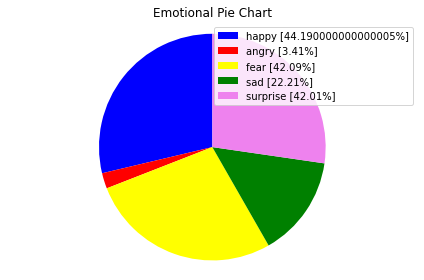

In [42]:
#emotion Textmining
labels = ['happy ['+str(happy_score)+'%]', 'angry ['+str(angry_score)+'%]', 
'fear ['+str(fear_score)+'%]','sad ['+str(sad_score)+'%]','surprise ['+str(surprise_score)+'%]']

total=[happy_score,angry_score,fear_score,sad_score,surprise_score]

colors = ['blue','red','yellow','green','violet']
patches, texts = plt.pie(total, colors=colors, startangle=90)
plt.legend(patches,labels,loc="best")
plt.title("Emotional Pie Chart")
plt.axis('equal')
plt.tight_layout()




### The above piechart represents the feelings of the person in review.